#### Example resizing an image

Original image shape:  (256, 256)


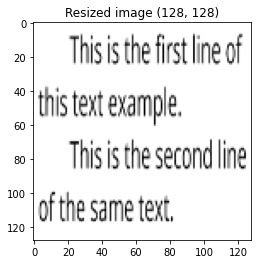

In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from noise import noisify, NoiseTypes

example_image_fp = '../data/sample_images/text_image.png'
# read image and convert it from BGR to Gray format
image = cv2.cvtColor(cv2.imread(example_image_fp), cv2.COLOR_BGR2GRAY)
print('Original image shape: ', image.shape)
# interpolation is one of cv2.INTER_* (e.g INTER_NEAREST, INTER_LINEAR, INTER_CUBIC, etc)
image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_CUBIC)
# or image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(image, cmap='gray');
plt.title(f'Resized image {image.shape}');

#### Example adding noise to an image

In [2]:
import numpy as np


np.random.normal()

-0.49592875041405493

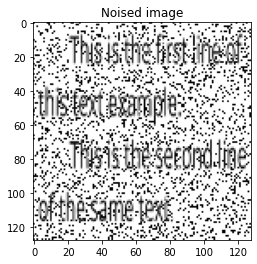

In [3]:
from image_ops import *
from functools import reduce


degr_pipeline = [GaussianNoiseOperation(), SaltPepperOperation()]

# noise_type is one of SALT_AND_PEPPER, GAUSSIAN, POISSON, SPECKLE
noised = reduce(lambda image, op: op(image), degr_pipeline, image)
plt.imshow(noised, cmap='gray')
plt.title('Noised image');

In [9]:
from metrics import edit_distance

    
print(edit_distance('cat', 'dog'))
print(edit_distance('kelm', 'hello'))
print(edit_distance('ab', 'ba'))
print(edit_distance('ab', 'ba'))

3.0
3.0
2.0
2.0


In [16]:
import pytesseract as tesseract


# specify path to the preinstalled binary file of tesseract
tesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

print('Tesseract version: ', tesseract.get_tesseract_version())

outp_text = tesseract.image_to_string(noised)
gt_text = 'This is the first line of\nthis text example. This is the second line\nof the same text.'
print('Ground truth text:', repr(gt_text))
print('Recognized text:', repr(outp_text))
print('Edit distance between the two:', edit_distance(gt_text, outp_text))

Tesseract version:  5.0.0-alpha.20200328
Ground truth text: 'This is the first line of\nthis text example. This is the second line\nof the same text.'
Recognized text: ' \n\x0c'
Edit distance between the two: 84.0


In [17]:
psnr_fig = cv2.PSNR(image, noised)
print('PSNR')

8.681622095663979